<a href="https://colab.research.google.com/github/onurakdmr/Emotion-Detection/blob/main/Emotion_Detection_by_Webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0


--2023-12-24 17:24:26--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-12-24 17:24:26--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0aa6e3d70b76c081a1704f4f75.dl.dropboxusercontent.com/cd/0/inline/CKBWobPQjkcg3x8YtDeLscnJJodv4kikT85wFexL26vb_cLHLnlLiTKIJFrqo5-WAsNDC3nrdNf2kFI3bGFi1SPSehQ0BdPMvJDkflbOUTAxkjoZCc2LJRaEZRBfcJtssT8lzKjXleatbhH8htuqSSqK/file# [following]
--2023-12-24 17:24:27--  https://uc0aa6e3d70b76c081a1704f4f75.dl.dropboxusercontent.com/cd/0/inline/CKBWobPQjkcg3x8YtDeLscnJJodv4kikT85wFexL26vb_cLHLnlLiTKIJFrqo5-WAsNDC3nrdNf2kFI3bGFi1SPSehQ0BdPMvJDk

In [18]:
!unzip dataset.zip?dl=0


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

**Building our Model To train the data**

In [20]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [21]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )


**Preparing our data using data generator**


In [22]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [23]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


**Visualizaing the data that is fed to train data gen**

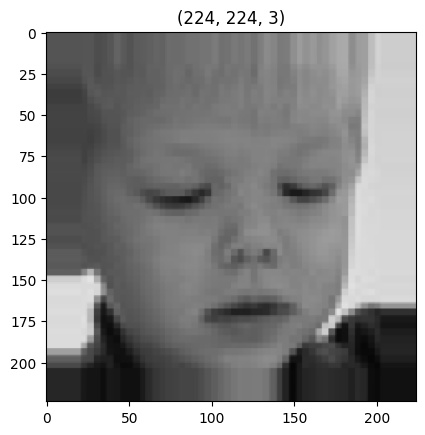

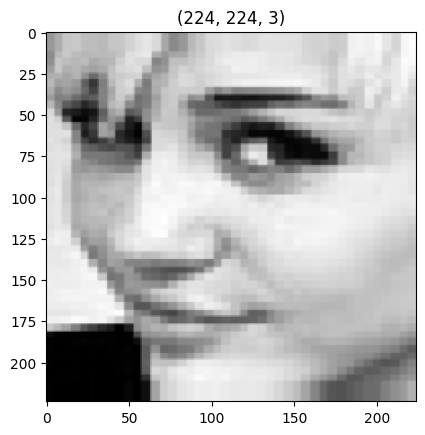

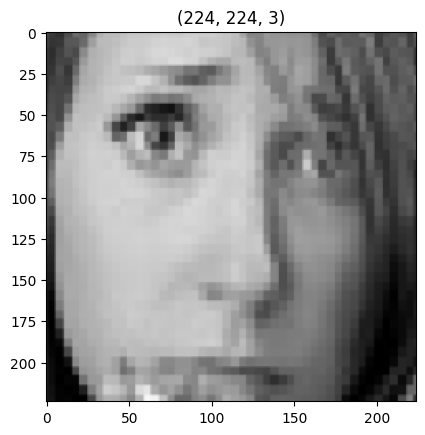

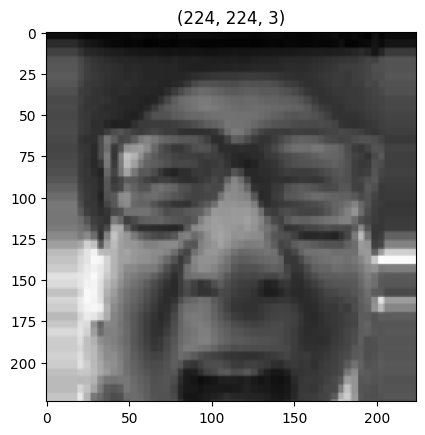

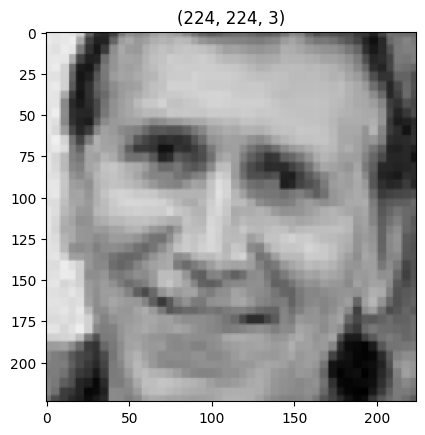

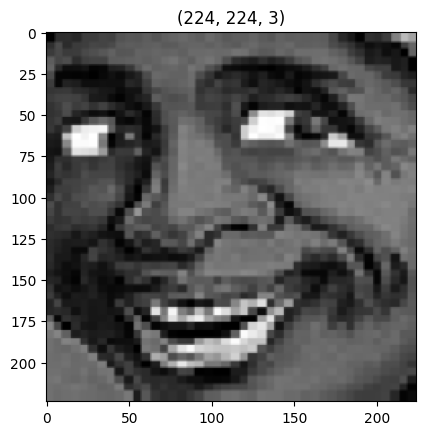

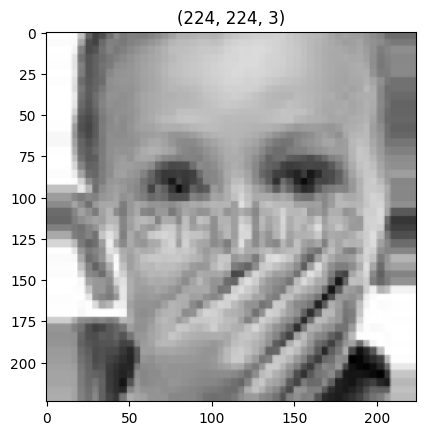

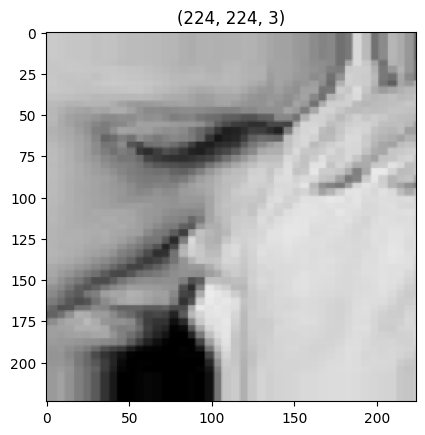

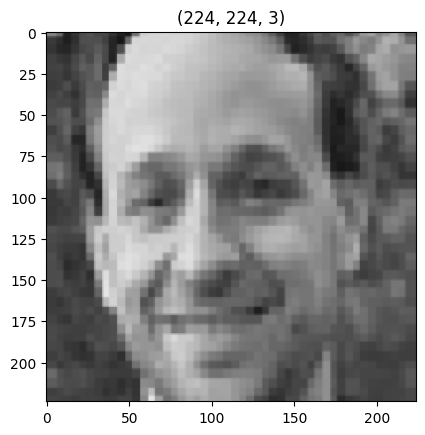

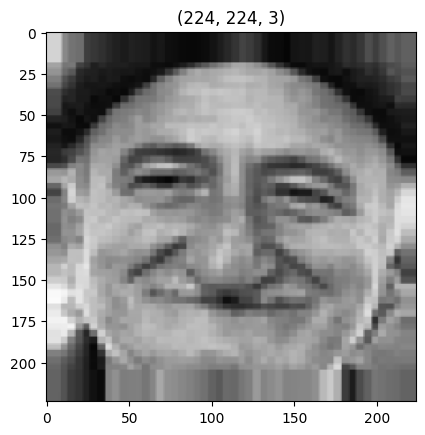

In [24]:
# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

**having early stopping and model check point**


In [25]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [26]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-26-7dbb6b2d1ed1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 22.6851 - accuracy: 0.2031
Epoch 1: val_accuracy improved from -inf to 0.35547, saving model to best_model.h5
10/10 [==============================] - 8s 690ms/step - loss: 22.6851 - accuracy: 0.2031 - val_loss: 14.8876 - val_accuracy: 0.3555
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 12.2435 - accuracy: 0.3031
Epoch 2: val_accuracy improved from 0.35547 to 0.35938, saving model to best_model.h5
10/10 [==============================] - 4s 430ms/step - loss: 12.2435 - accuracy: 0.3031 - val_loss: 9.2478 - val_accuracy: 0.3594
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 7.8492 - accuracy: 0.3219
Epoch 3: val_accuracy did not improve from 0.35938
10/10 [==============================] - 6s 604ms/step - loss: 7.8492 - accuracy: 0.3219 - val_loss: 7.2204 - val_accuracy: 0.3125
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 7.4036 - accuracy: 0.3125
Epoch 

In [27]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [28]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

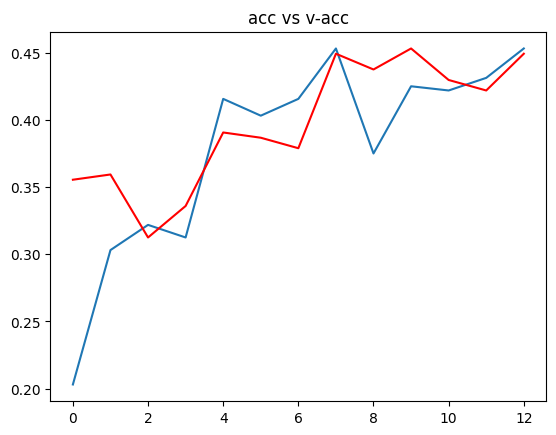

In [29]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

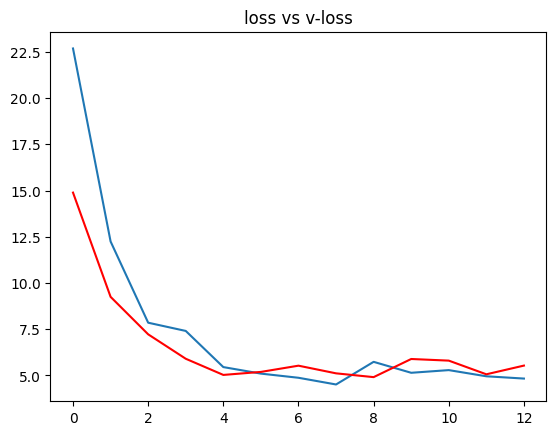

In [30]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [31]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 880ms/step
 the image is of happy


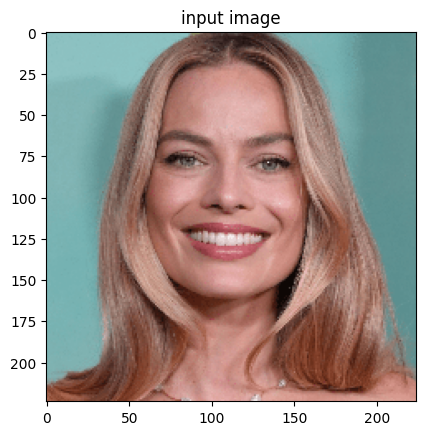

In [32]:
# path for the image to see if it predics correct class

path = "/content/margot.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

**Access Webcam for Images and Video**

In [33]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

**Helper Functions**

**Below are a few helper function to make converting between different image data types and formats.**

In [34]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

**Haar Cascade Classifier Indented block**

**For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model.**

In [35]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

**Webcam Images**
**Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's Code Snippets that has a variety of useful code functions to perform various tasks.**

**We will be using the code snippet for Camera Capture to utilize your computer's webcam.**

In [36]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


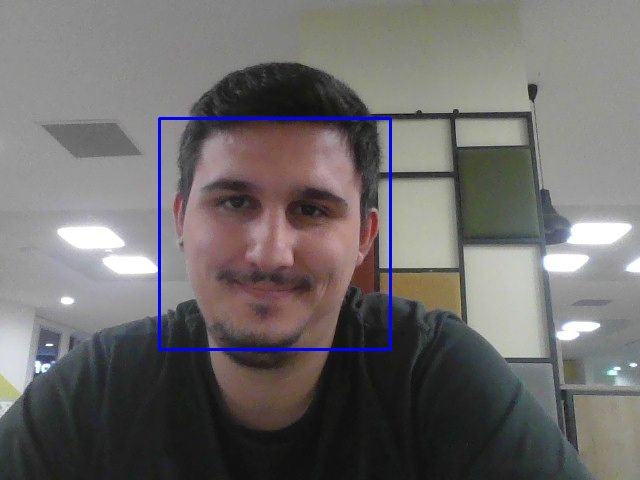

In [37]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Webcam Videos**

**Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.**
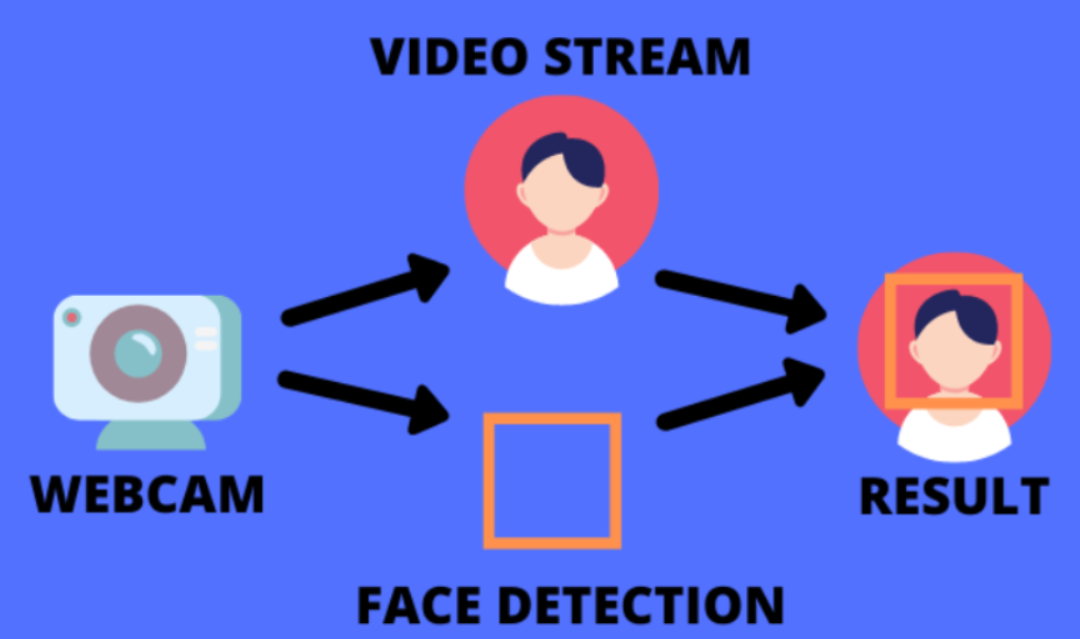


In [38]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [39]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 445ms/step
Max Index: 3
Predicted Emotion from the Face Detection: happy


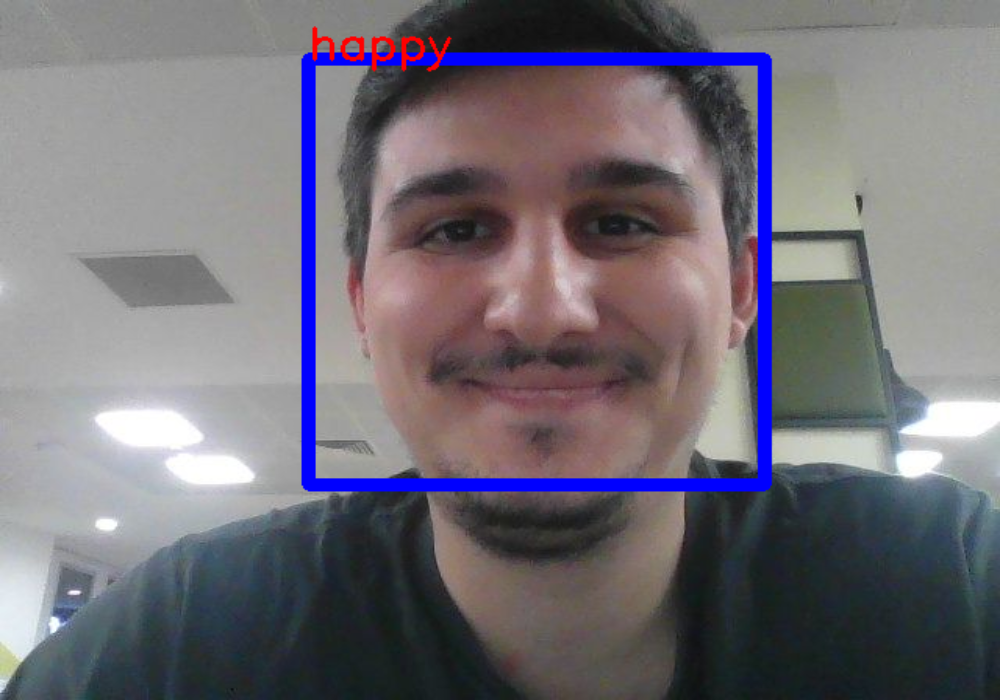

In [115]:
import cv2
import numpy as np
from keras.preprocessing import image
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import io
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the model
model = load_model("best_model.h5")

face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to capture a video frame using webcam in Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture a photo using the webcam
take_photo()

# Read the captured image
test_img = cv2.imread('photo.jpg')
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

for (x, y, w, h) in faces_detected:
    cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
    roi_gray = gray_img[y:y + w, x:x + h]
    roi_gray = cv2.resize(roi_gray, (224, 224))
    img_pixels = image.img_to_array(roi_gray)
    img_pixels = np.expand_dims(img_pixels, axis=0)
    img_pixels /= 255

    predictions = model.predict(img_pixels)

    max_index = np.argmax(predictions[0])

    # Print the predicted class index
    print("Max Index:", max_index)

    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    predicted_emotion = emotions[max_index]

    # Ensure that max_index is within the range of emotions tuple
    if 0 <= max_index < len(emotions):
        predicted_emotion = emotions[max_index]
        # Print the predicted emotion
        print("Predicted Emotion from the Face Detection:", predicted_emotion)
        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        print("Error: Index out of range for emotions tuple.")

resized_img = cv2.resize(test_img, (1000, 700))
cv2_imshow(resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [116]:
from google.colab import drive
from IPython.display import HTML

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
from IPython.display import HTML

# Define a dictionary mapping emotions to YouTube video links
emotion_video_dict = {
        'angry': 'https://www.youtube.com/watch?v=25DC6v8oPxo',
    'disgust': 'https://www.youtube.com/watch?v=1zEIuTPho34&list=RDGMEMQ1dJ7wXfLlqCjwV0xfSNbAVM1zEIuTPho34&start_radio=1',
    'fear': 'https://www.youtube.com/watch?v=peLRPSCeppI',
    'happy': 'https://www.youtube.com/watch?v=ZbZSe6N_BXs',
    'sad': 'https://www.youtube.com/watch?v=xpCl_P03AaA',
    'surprise': 'https://www.youtube.com/watch?v=yuFI5KSPAt4',
    'neutral': 'https://www.youtube.com/watch?v=dvgZkm1xWPE&list=RDGMEMQ1dJ7wXfLlqCjwV0xfSNbAVM1zEIuTPho34&index=18'
}

# Print the predicted class index
print("Max Index:", max_index)

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
predicted_emotion = emotions[max_index]

# Ensure that max_index is within the range of emotions tuple
if 0 <= max_index < len(emotions):
    predicted_emotion = emotions[max_index]
    # Print the predicted emotion
    print("Predicted Emotion from the Face Detection:", predicted_emotion)
    cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Get the YouTube video link based on the predicted emotion
    youtube_video_link = emotion_video_dict.get(predicted_emotion, 'https://www.youtube.com/watch?v=default_youtube_video_link')
    print("Recommended YouTube Video Link:", youtube_video_link)

    # Display a clickable link to the YouTube video
    display(HTML(f'<a href="{youtube_video_link}" target="_blank">Click here to watch the recommended YouTube video</a>'))
else:
    print("Error: Index out of range for emotions tuple.")
    youtube_video_link = 'https://www.youtube.com/watch?v=default_youtube_video_link'


Max Index: 3
Predicted Emotion from the Face Detection: happy
Recommended YouTube Video Link: https://www.youtube.com/watch?v=ZbZSe6N_BXs
